In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
from scipy import stats
from scipy.stats import ttest_1samp, ttest_ind

In [2]:
shinglesdf=pd.read_csv('A+&+B+shingles.csv')

In [3]:
shinglesdf

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37
5,0.24,0.18
6,0.16,0.42
7,0.20,0.58
8,0.20,0.25
9,0.20,0.41


Problem 3 (Download Data)

An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and coloring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet are calculated. The company would like to show that the mean moisture content is less than 0.35 pounds per 100 square feet.

The file (A & B shingles.csv) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.

3.2 Do you think that the population means for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

In [4]:
shinglesdf.mean()

A    0.316667
B    0.273548
dtype: float64

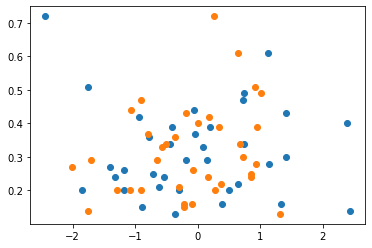

In [25]:
x=shinglesdf['A']
y=shinglesdf['B']
plt.plot(np.random.randn(len(x)),x,'o',);
plt.plot(np.random.randn(len(y)),x,'o',);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


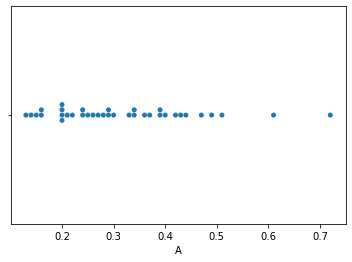

In [24]:
sns.swarmplot(shinglesdf['A']);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


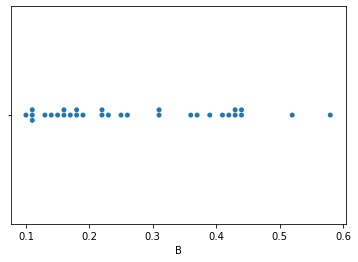

In [20]:
sns.swarmplot(shinglesdf['B']);

In [26]:
shinglesdf.A.mean()

0.3166666666666666

In [27]:
shinglesdf.A.std()

0.13573082605973166

In [28]:
a=shinglesdf.copy()
del a['B']
a.head()

,A
0,0.44
1,0.61
2,0.47
3,0.30
4,0.15


In [43]:
# one sample t-test
# null hypothesis: expected value = 0.35
t_statistic, p_value = ttest_1samp(a, 0.35)
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value))

One sample t test 
t statistic: [-1.47350463] p value: [0.14955266] 


In [49]:
printt_statistic, p_value = ttest_1samp(shinglesdf.A, 0.35)

In [50]:
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value/2))

One sample t test 
t statistic: -1.4735046253382782 p value: 0.07477633144907513 


In [44]:
t_statistic, p_value = ttest_1samp(b, 0.35)
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value))

One sample t test 
t statistic: [-3.10033131] p value: [0.00418095] 


In [30]:
stats.norm.ppf(0.35)

-0.38532046640756773

In [31]:
stats.zscore(a)

,A
0,0.921551
1,2.191796
2,1.145712
3,-0.124534
4,-1.245339
5,-0.572856
6,-1.170618
7,-0.871737
8,-0.871737
9,-0.871737


In [33]:
t_statistic, p_value  = ttest_ind(shinglesdf['A'],shinglesdf['B'])
print('tstat',t_statistic)    
print('P Value',p_value)

tstat nan
P Value nan


In [34]:
b=shinglesdf.copy()
del b['A']
b.head()

,B
0,0.14
1,0.15
2,0.31
3,0.16
4,0.37


In [35]:
b.drop([31,32,33,34,35],axis=0,inplace=True)

In [36]:
stats.zscore(b)

,B
0,-0.988780
1,-0.914740
2,0.269884
3,-0.840701
4,0.714119
5,-0.692623
6,1.084314
7,2.268939
8,-0.174350
9,1.010275


Q. 3.1 Do you think there is evidence that mean moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

In [54]:
t_statistic, p_value = ttest_1samp(shinglesdf.A, 0.35)
t_statistic, p_value/2

(-1.4735046253382782, 0.07477633144907513)

As P value is 0.0748 > 0.05 we can not conclude that the mean value of sample A is less than 0.35 pounds per 100 square feet.

In [60]:
t_statistic, p_value = ttest_1samp(shinglesdf.B, 0.35,nan_policy='omit' )
t_statistic, p_value/2

(-3.1003313069986995, 0.0020904774003191826)

As P value is 0.0021  < 0.05 we can conclude that the mean value of sample B is not less than 0.35 pounds per 100 square feet.

Q. 3.2 Do you think that the population means for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

In [75]:
t_statistic,p_value=ttest_ind(shinglesdf['A'],shinglesdf['B'],equal_var=True ,nan_policy='omit')  
round(t_statistic,3),round(p_value,3)

(1.29, 0.202)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


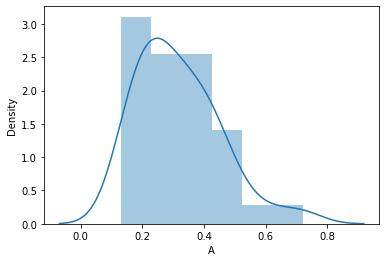

In [80]:
sns.distplot(shinglesdf['A']);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


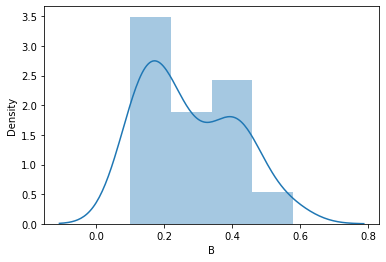

In [81]:
sns.distplot(shinglesdf['B']);